In [1]:
from Functions import *

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import scipy
from scipy.linalg import pinv
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, train_test_split, validation_curve, GridSearchCV, learning_curve
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time

warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

In [3]:
df = pd.read_csv('data/heart_disease_data.csv')
target_col = 'HeartDisease'
X = scale(df.drop(target_col, axis=1))
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(5)

In [43]:
df.shape

(755, 17)

# k-Means

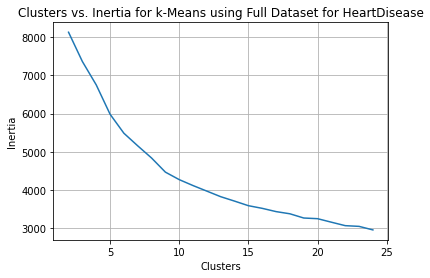

In [4]:
s_scores = plot_inertia(X, 'Full Dataset', target_col, split=True)

> **intertia**: Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

>A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

>To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow

[source](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

For n_clusters = 6 The average silhouette_score is : 0.21949914885202254


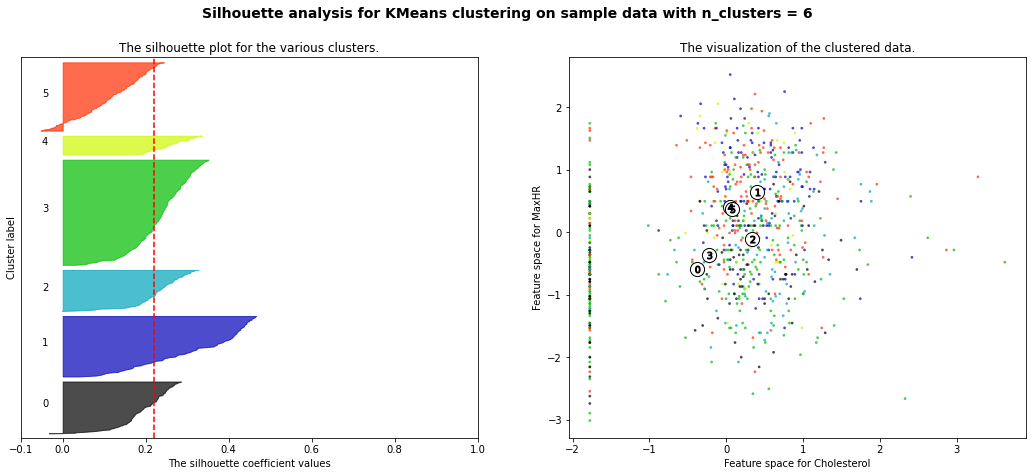

In [128]:
# Code taken from scikit-learn examples (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

range_n_clusters = np.arange(6, 7, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    col1, col2 = 2, 4
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, col1], X[:, col2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, col1],
        centers[:, col2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[col1], c[col2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(f"Feature space for {df.drop(target_col, axis=1).columns[col1]}")
    ax2.set_ylabel(f"Feature space for {df.drop(target_col, axis=1).columns[col2]}")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

### Plotting Silhouette Scores

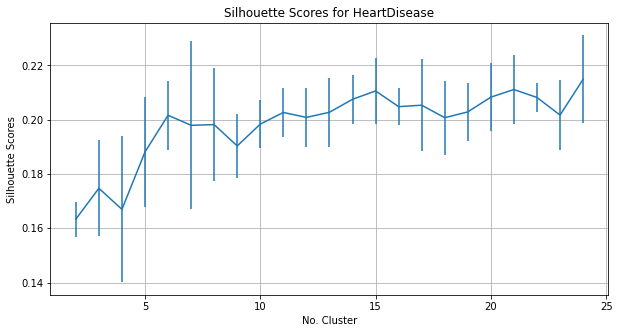

In [44]:
s_scores_df = pd.DataFrame(s_scores)
fig, ax = plt.subplots(figsize=(10,5))
s_avgs = s_scores_df.groupby('cluster').mean()
ax.errorbar(s_avgs.index, s_avgs['silhouette score'], yerr=s_scores_df.groupby('cluster').std()['silhouette score'])
ax.set_title(f'Silhouette Scores for {target_col}')
ax.set_ylabel('Silhouette Scores')
ax.set_xlabel('No. Cluster')
ax.grid();

> **silhouette score**: The value of the silhouette *coefﬁcient* is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

Inertia          :  7093.274406218741
Silhouette score :  0.2215183375013248
AMI score        :  0.14629537379299018
Cluster 0:
	True  : 74.0%
	False : 26.0%
Cluster 1:
	True  : 28.0%
	False : 72.0%
Cluster 2:
	True  : 79.0%
	False : 21.0%
Cluster 3:
	True  : 80.0%
	False : 20.0%
Cluster 4:
	True  : 10.0%
	False : 90.0%
Cluster 5:
	True  : 45.0%
	False : 55.0%


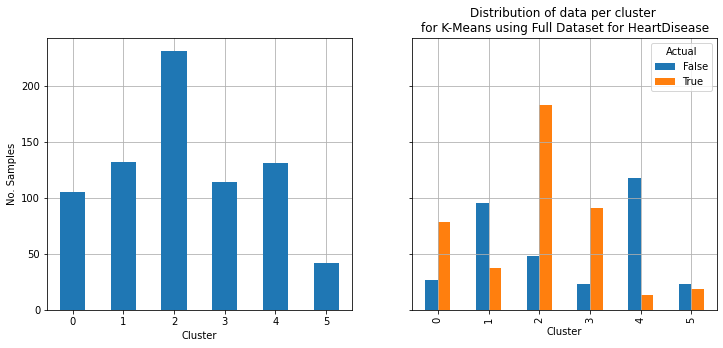

In [158]:
kmeans_cluster = plot_kmeans_cluster_dist(6, X, y, 'Full Dataset', target_col);
get_cluster_breakdown(kmeans_cluster.labels_, y)

Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings  and , the AMI is given as:

$AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]$
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching  (label_true) with  (labels_pred) will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.
[sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html)

# GMM
>A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means [source--don't reference](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

In [113]:
def run_gmm(X, covs=['spherical', 'tied', 'diag', 'full'], n_comps=range(1, 20), verbose=False):
    best_score = -np.infty
    s_scores = np.zeros((len(covs),len(n_comps)))
    for i, cov in enumerate(covs):
        for j, n in enumerate(n_comps):
            gmm = GaussianMixture(n_components=n, covariance_type=cov, random_state=0)
            gmm.fit(X)
            s_scores[i][j] = silhouette_score(X, gmm.predict(X))
            if s_scores[i][j] > best_score:
                best_score = s_scores[i][j]
                if verbose:
                    print("Best Silhouette Score currently for", cov, n)
                best_gmm = gmm
    return best_gmm, s_scores

def plot_bic(bic, model_name, data_set, target_col, n_comps=range(1, 20), covs=['spherical', 'tied', 'diag', 'full']):
    plt.figure(figsize=(8,5))
    for i, b in enumerate(bic):
        plt.plot(n_comps, b, label=covs[i])
    plt.legend()
    plt.xticks(n_comps)
    plt.title(f"Number of Components vs. Silhouette Score\nfor {model_name} using {data_set} for {target_col}")
    plt.xlabel("Number of Components")
    plt.ylabel("Silhouette Scores")
    plt.show()

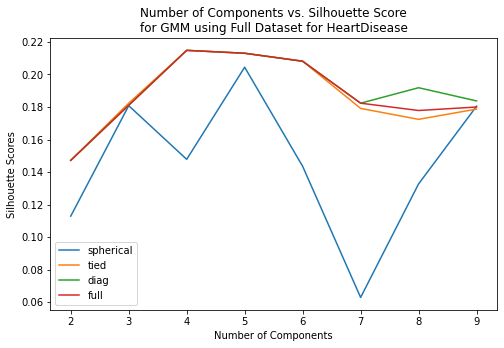

In [114]:
min_comps, max_comps = 2, 10
best_gmm, bic = run_gmm(X, n_comps=range(min_comps,max_comps))
plot_bic(bic, 'GMM', data_set='Full Dataset', target_col=target_col, n_comps=range(min_comps,max_comps))

>**Bayesian information criterion (BIC)**: This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution. In order to avoid overfitting, this technique penalizes models with big number of clusters.

In [118]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,IsMale
0,40,True,289,False,172,False,0.0,1,False,False,True,False,False,False,True,False,True
1,49,True,180,False,156,False,1.0,0,True,False,False,True,False,False,True,False,False
2,37,True,283,False,98,False,0.0,1,False,False,True,False,False,False,False,True,True
3,48,True,214,False,108,True,1.5,0,True,True,False,False,False,False,True,False,False
4,54,True,195,False,122,False,0.0,1,False,False,False,True,False,False,True,False,True


For n_clusters = 4 
The average silhouette_score is : 0.1891937799175245


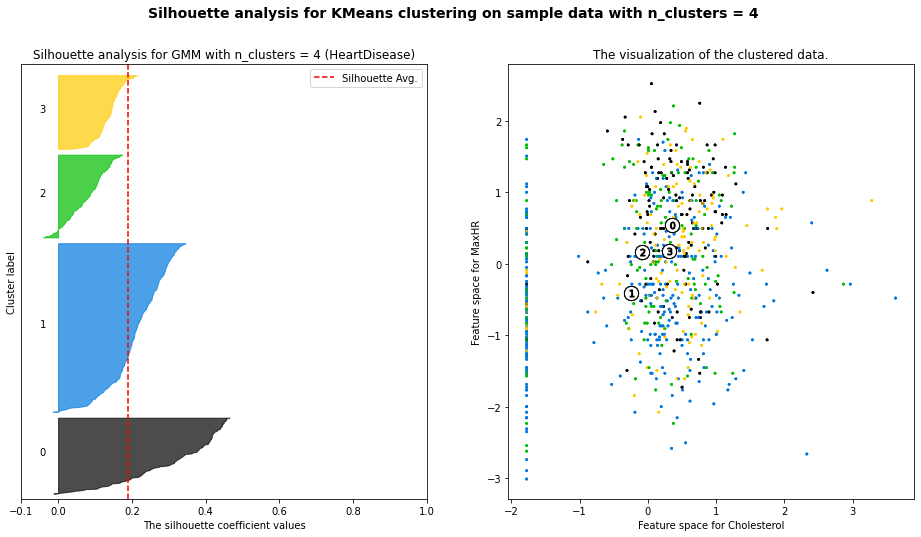

In [119]:
n_clusters = best_gmm.n_components
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 12])
clusterer = GaussianMixture(n_components=n_clusters, covariance_type=best_gmm.covariance_type, random_state=2)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "\nThe average silhouette_score is :",
    silhouette_avg,
)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

    ax1.set_title(f"Silhouette analysis for GMM with n_clusters = {n_clusters} ({target_col})")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    col1 = 2
    col2 = 4
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, col1], X[:, col2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, col1],
        centers[:, col2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[col1], c[col2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(f"Feature space for {df.drop(target_col, axis=1).columns[col1]}")
    ax2.set_ylabel(f"Feature space for {df.drop(target_col, axis=1).columns[col2]}")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label='Silhouette Avg.')
ax1.legend()
plt.show()

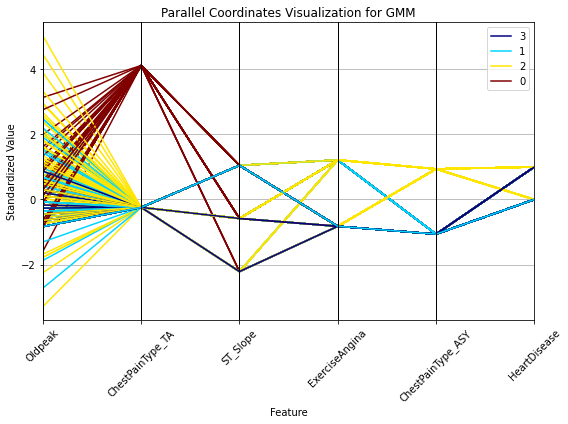

In [122]:
gmm_labels=best_gmm.predict(X)
np.random.seed(40)
cols = df.drop([target_col], axis=1).columns
data_viz = pd.DataFrame(X, columns = cols)
data_viz[target_col] = y
data_viz['cluster_class'] = gmm_labels

idx_viz = np.append(np.random.randint(0, data_viz.shape[1] - 2, 5), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_class', colormap='jet')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Standardized Value')
plt.title('Parallel Coordinates Visualization for GMM')
plt.tight_layout()

In [153]:
def plot_cluster_dist(best_model, X, y, model_name, data_set, target_col):
    labels = best_model.predict(X)
    silhouette_score_value = silhouette_score(X, labels)
    adjusted_mutual_info_score_value = adjusted_mutual_info_score(y, labels)
    print('Silhouette score : ', silhouette_score_value)
    print('AMI score        : ', adjusted_mutual_info_score_value)
    title = f'Distribution of data per cluster \nfor {target_col} for {model_name} using {data_set}'
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
#     plt.suptitle(title)
    ax1.hist(labels, bins=np.arange(0, best_model.n_components+1) - 0.5, rwidth=0.5, zorder=2)
    ax1.set_xlabel('Cluster')
    ax1.set_ylabel('No. Samples')
    t = pd.DataFrame(zip(labels.reshape(-1), y.values.reshape(-1)),columns=['Predicted', 'Actual'])
    t['ones'] = 1
    t.groupby(['Predicted', 'Actual']).count()['ones'].unstack().plot.bar(xlabel='Cluster', ylabel='Samples', ax=ax2)
    ax1.grid()
    ax2.grid()
    ax2.set_title(title)

Silhouette score :  0.21481766573055625
AMI score        :  0.15624027159074397


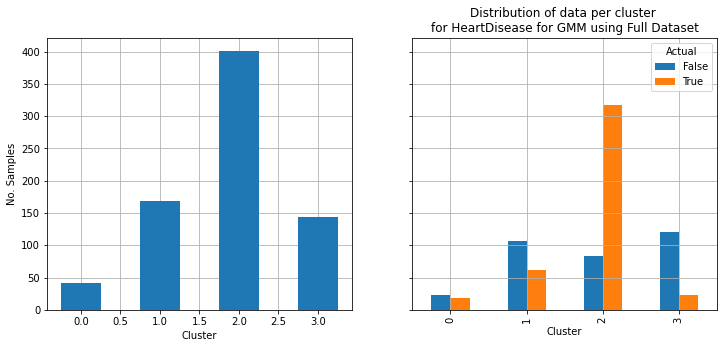

In [154]:
plot_cluster_dist(best_gmm, X, y, 'GMM', 'Full Dataset', target_col)

In [ ]:
gmm_preds = gmm.predict()

# PCA

In [129]:
pca = PCA(random_state=0)
pca.fit(X);

In [144]:
def plot_pca_variance(pca, target_col='Diabetes'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
    ax1.set_xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
    ax1.set_xlabel('Component')
    ax1.set_ylabel('Variance')
    ax1.set_title(f'Variance vs.\nPCA Component for {target_col}')
    ax1.grid()

    ax2.bar(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
#     ax2.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='Variance')
    ax2.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), color='orange', label='Cumulative Variance')
    ax2.axhline(0.85, linestyle='--', color='red')
    ax2.set_xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 1))
    ax2.set_xlabel('Component')
    ax2.set_ylabel('Variance')
    ax2.set_title(f'Cumulative Variance vs.\nPCA Component for {target_col}')
    ax2.legend()
    ax2.grid()
    plt.tight_layout()

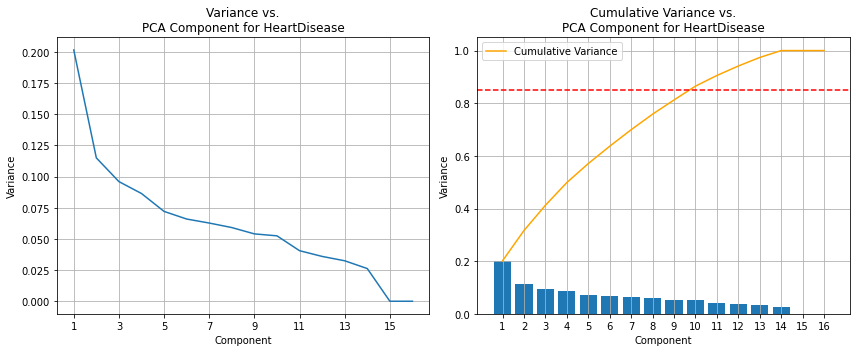

In [145]:
plot_pca_variance(pca, target_col)

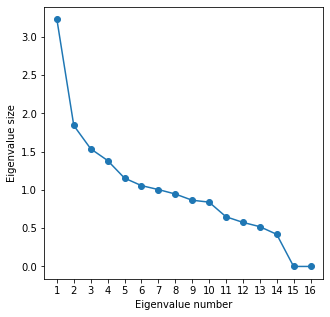

In [148]:
plt.figure(figsize=(5, 5))
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.xticks(range(len(pca.explained_variance_)), range(1, len(pca.explained_variance_)+1));

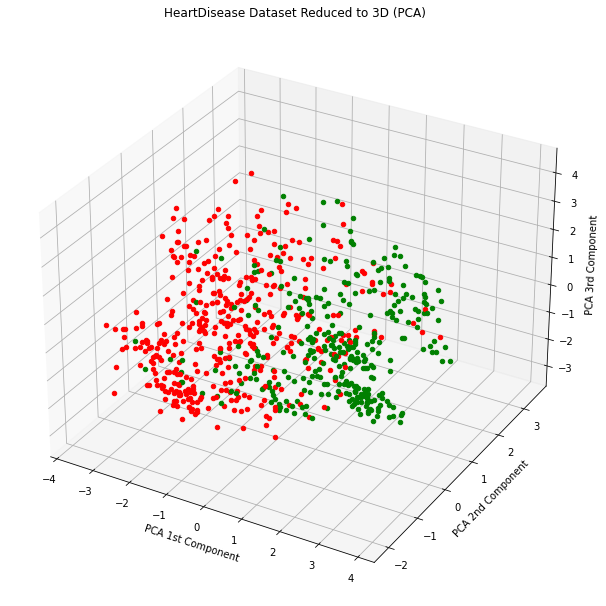

In [146]:
X_PCA = PCA(n_components = .85).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=0)
plot_3d(X_PCA, y, target_col=target_col, dataset='PCA')

# ICA

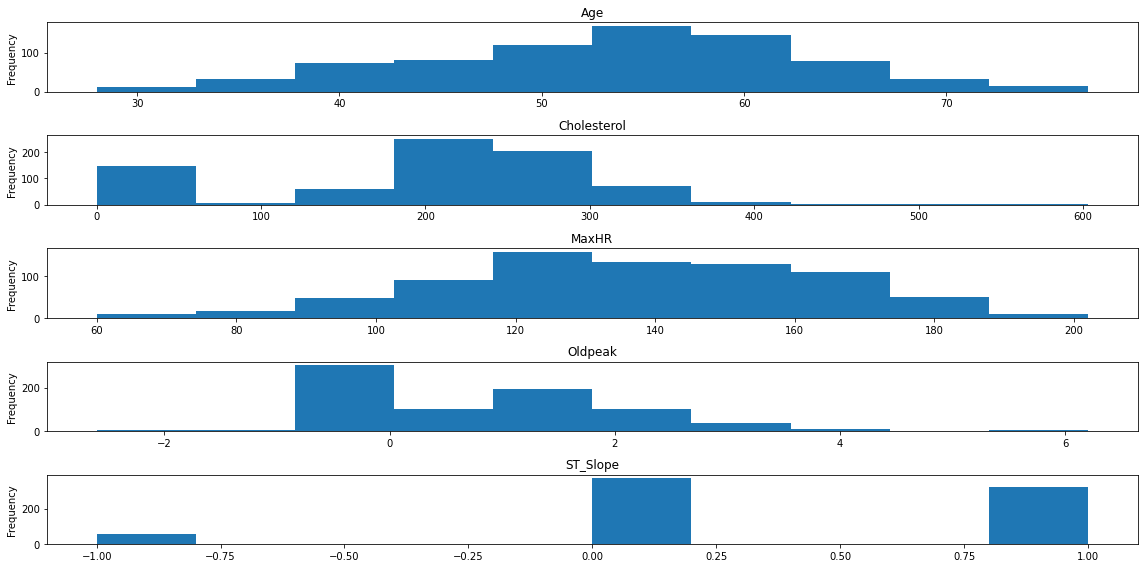

In [167]:
fig, ax = plt.subplots(5)
i=0
for col in df.columns:
    try:
        df[col].plot.hist(ax=ax[i], title=col)
        i+=1
    except:pass
plt.tight_layout()

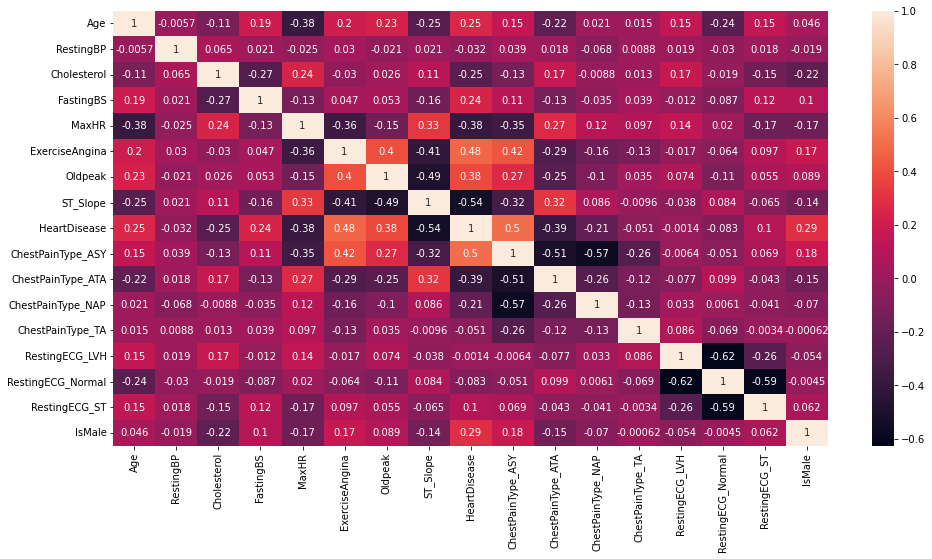

In [169]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

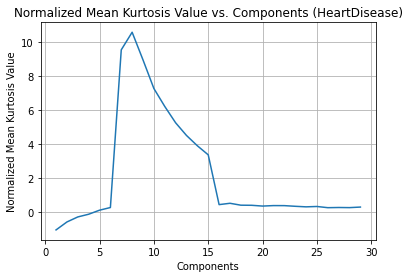

In [13]:
kurtosis_values = plot_kurtosis_values(X, target_col=target_col)

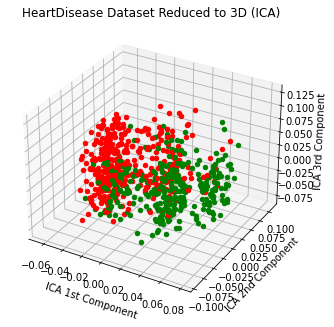

In [14]:
X_ICA = FastICA(n_components = np.argmax(kurtosis_values)+1).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, y, test_size=0.3, random_state=0)
plot_3d(X_ICA, y, target_col=target_col, dataset='ICA')

# Randomized Projections

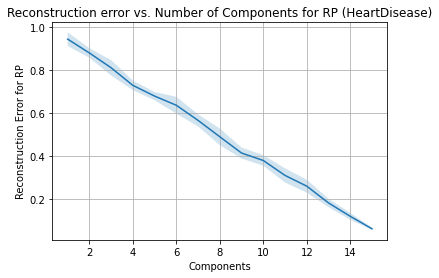

In [15]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,X.shape[1]):
    mean_mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X_train)
        w = X_RP.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X_train.T)).T
        mean_mse.append(mean_squared_error(X_train,reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
plt.plot(range(1, X.shape[1]),reconstruction_error)
plt.fill_between(range(1, X.shape[1]),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error for RP')
plt.title(f'Reconstruction error vs. Number of Components for RP ({target_col})')
plt.grid()

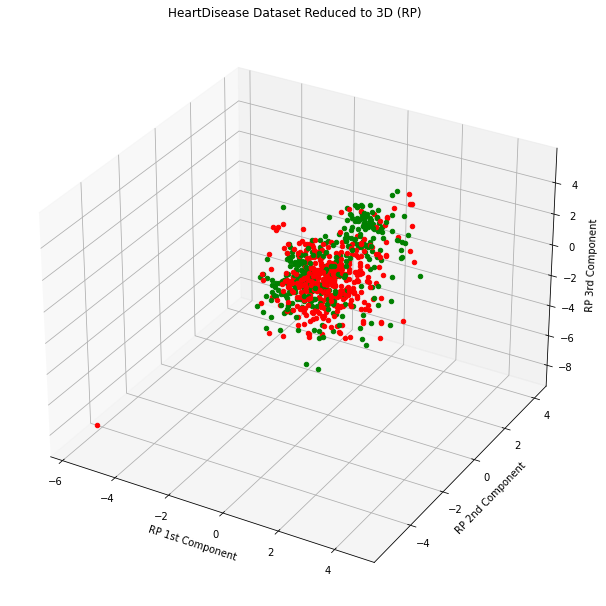

In [170]:
X_RP = GaussianRandomProjection(n_components = 8).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, y, test_size=0.3, random_state=0)
plot_3d(X_RP, y, target_col=target_col, dataset='RP')

# Feature Selection (Decision Tree)

Features selected: ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope', 'ChestPainType_ASY']


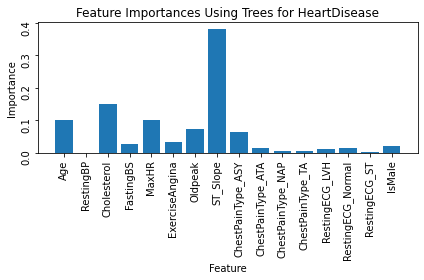

In [42]:
X_df = pd.DataFrame(X, columns=df.drop(target_col, axis=1).columns)

dt = DecisionTreeClassifier()
dt = dt.fit(X_df,y)
model = SelectFromModel(dt, prefit=True)
X_tree = model.transform(X_df)
feats = model.get_feature_names_out(X_df.columns)
print(f'Features selected: {[feat for feat in feats]}')
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y, test_size=0.3, random_state=0)
plt.bar(df.drop(target_col, axis=1).columns, dt.feature_importances_)
plt.xticks(range(df.shape[1]-1), df.drop(target_col, axis=1).columns)
plt.tick_params(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importances Using Trees for {target_col}')
plt.tight_layout();

# Clustering with Dimensionality Reduction
## k-Means

Inertia          :  1471.4822676226306
Silhouette score :  0.37821663383631315
AMI score        :  0.19706323848920032
Cluster 0:
	True  : 17.0%
	False : 83.0%
Cluster 1:
	True  : 27.0%
	False : 73.0%
Cluster 2:
	True  : 83.0%
	False : 17.0%
Cluster 3:
	True  : 75.0%
	False : 25.0%
Cluster 4:
	True  : 88.0%
	False : 12.0%


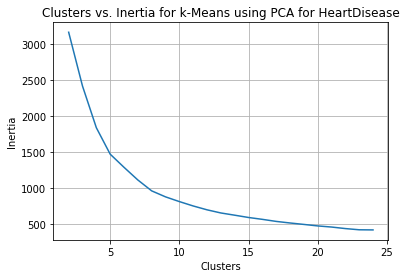

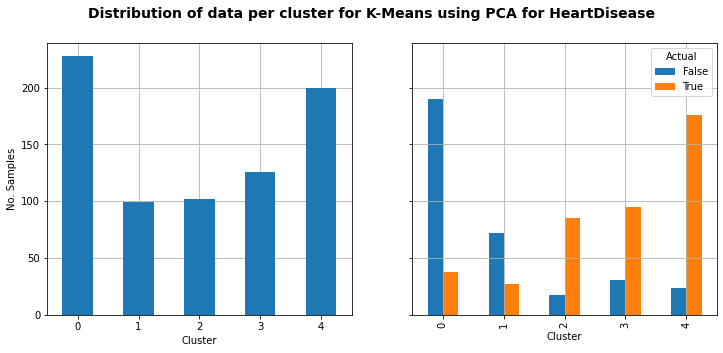

In [18]:
data_set = 'PCA'
plot_inertia(X_PCA, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(5, X_PCA, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

Inertia          :  3.27354475122191
Silhouette score :  0.28428646198044333
AMI score        :  0.11629931854733856
Cluster 0:
	True  : 45.0%
	False : 55.0%
Cluster 1:
	True  : 8.0%
	False : 92.0%
Cluster 2:
	True  : 81.0%
	False : 19.0%
Cluster 3:
	True  : 33.0%
	False : 67.0%
Cluster 4:
	True  : 100.0%
	False : 0.0%
Cluster 5:
	True  : 71.0%
	False : 29.0%
Cluster 6:
	True  : 58.0%
	False : 42.0%


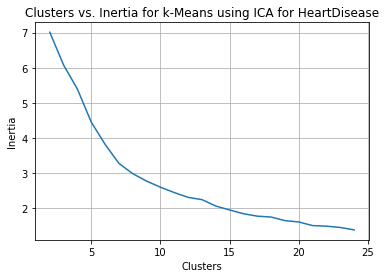

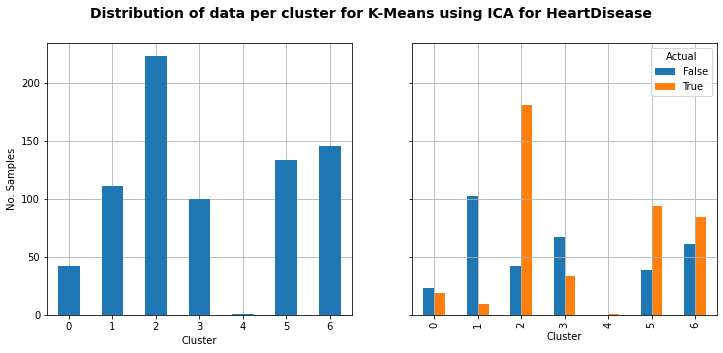

In [19]:
data_set = 'ICA'
plot_inertia(X_ICA, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(7, X_ICA, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

Inertia          :  6424.800424507894
Silhouette score :  0.2693982834124446
AMI score        :  0.05926696934056123
Cluster 0:
	True  : 65.0%
	False : 35.0%
Cluster 1:
	True  : 22.0%
	False : 78.0%
Cluster 2:
	True  : 55.0%
	False : 45.0%
Cluster 3:
	True  : 100.0%
	False : 0.0%
Cluster 4:
	True  : 69.0%
	False : 31.0%


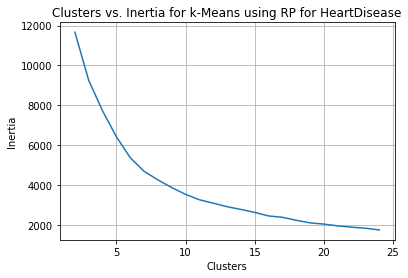

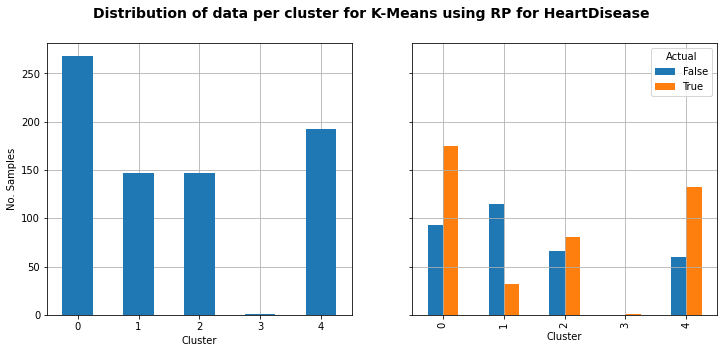

In [20]:
data_set = 'RP'
plot_inertia(X_RP, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(5, X_RP, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

Inertia          :  3318.1539368267922
Silhouette score :  0.250334445005028
AMI score        :  0.2849656171406679
Cluster 0:
	True  : 84.0%
	False : 16.0%
Cluster 1:
	True  : 24.0%
	False : 76.0%


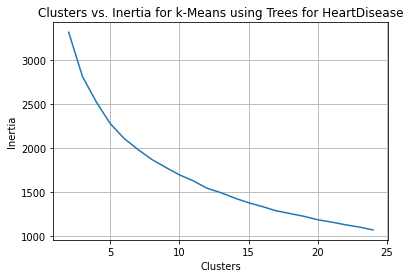

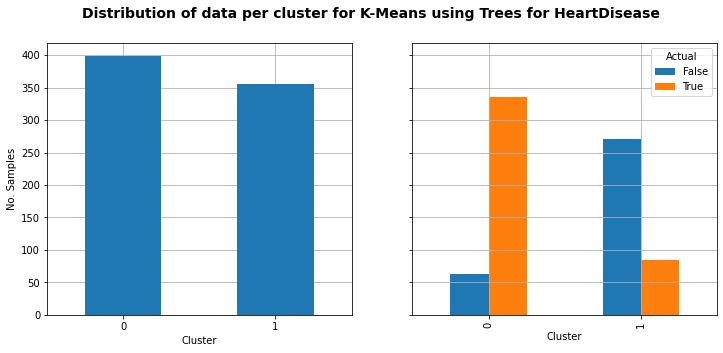

In [21]:
data_set = 'Trees'
plot_inertia(X_tree, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(2, X_tree, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

## GMM

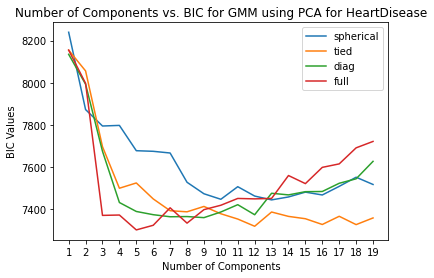

Silhouette score :  0.32437983771465817
AMI score        :  0.16629589034250375


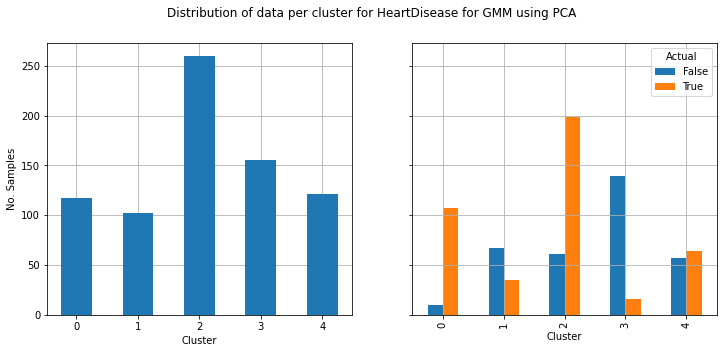

In [22]:
model_name = 'GMM'
data_set = 'PCA'

best_gmm, bic = run_gmm(X_PCA)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_PCA, y, model_name, data_set, target_col)

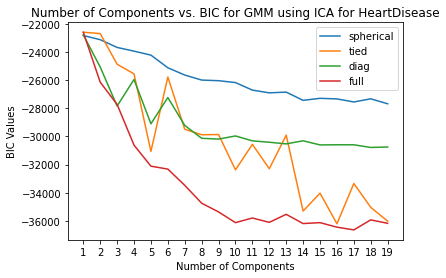

Silhouette score :  0.22887003916178533
AMI score        :  0.10101120655824108


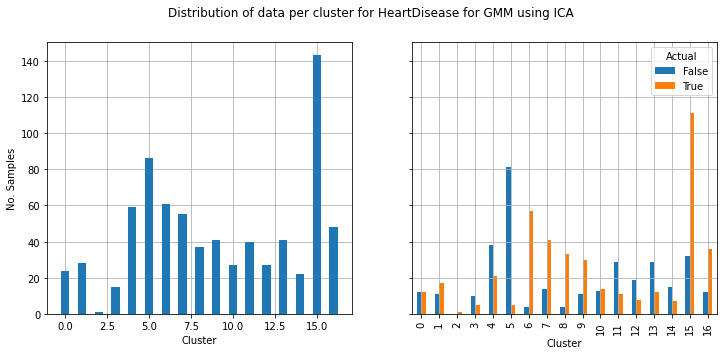

In [23]:
data_set = 'ICA'

best_gmm, bic = run_gmm(X_ICA)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_ICA, y, model_name, data_set, target_col)

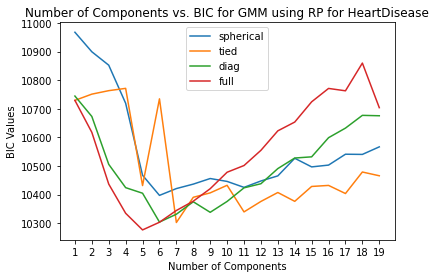

Silhouette score :  0.17052713070527847
AMI score        :  0.07325771922010486


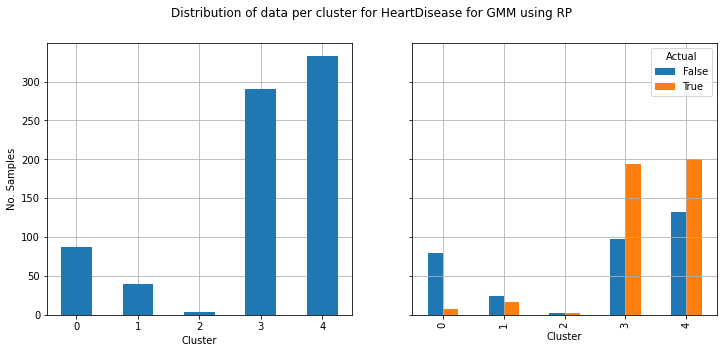

In [24]:
data_set = 'RP'

best_gmm, bic = run_gmm(X_RP)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_RP, y, model_name, data_set, target_col)

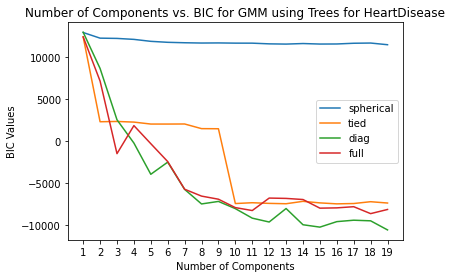

Silhouette score :  0.10158445923895558
AMI score        :  0.19987749848584432


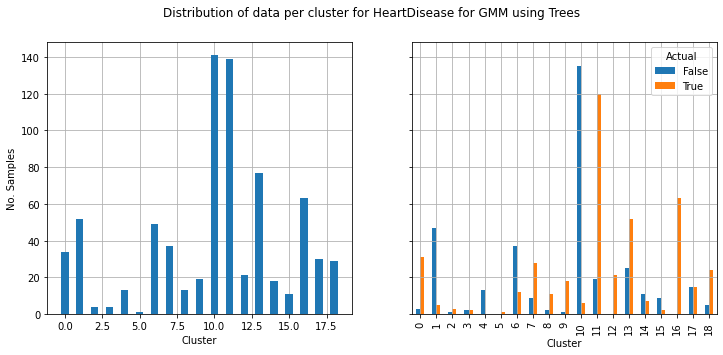

In [25]:
data_set = 'Trees'

best_gmm, bic = run_gmm(X_tree)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_tree, y, model_name, data_set, target_col)

# Training Neural Network

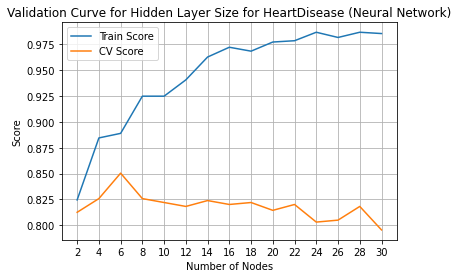

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

nn_classifier = MLPClassifier(random_state=0, max_iter=2000)
train_scores, test_scores = validation_curve(
    nn_classifier, 
    X_train, 
    y_train, 
    param_name="hidden_layer_sizes", 
    param_range=np.arange(2,31,2), 
    cv=4
)

plt.figure()
plt.plot(np.arange(2,31,2), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(2,31,2), np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title(f"Validation Curve for Hidden Layer Size for {target_col} (Neural Network)")
plt.xlabel("Number of Nodes")
plt.ylabel("Score")
plt.grid()
plt.xticks(np.arange(2,31,2))
plt.show()

In [27]:
metrics = []
param_grid = {
    'alpha'              : np.logspace(-3,3,7), 
    'hidden_layer_sizes' : np.arange(2,25,2)
}
ls = np.linspace(0.1,1.0,10)

Best params for neural network: {'alpha': 1.0, 'hidden_layer_sizes': 8}
Time to train: 178.3209352493286
Accuracy for best neural network: 0.8105726872246696
Time to infer: 0.0


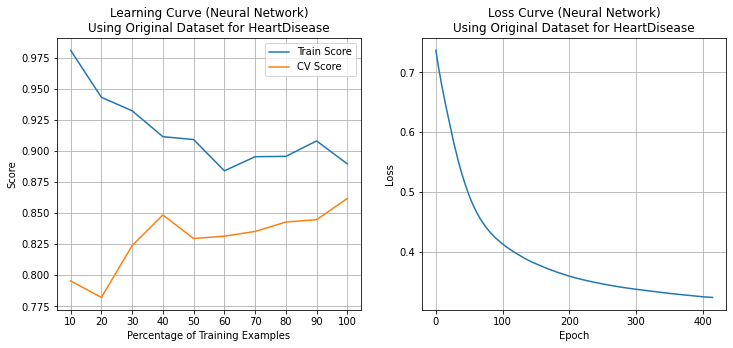

In [32]:
orig_nn_gs, train_time, pred_time, acc = nn_gs(param_grid, X_train, y_train, X_test, y_test, nn_classifier)
metrics.append({
    'Model'      : 'Original',
    'Train Time' : train_time, 
    'Pred Time'  : pred_time, 
    'Accuracy'   : acc
})

orig_nn = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = orig_nn_gs.best_params_['hidden_layer_sizes'], 
    alpha              = orig_nn_gs.best_params_['alpha']
)
orig_nn.fit(X_train, y_train)
plot_learning_loss_curves(ls, orig_nn, X_train, y_train, 'Original Dataset', target_col)

## PCA w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 10}
Time to train: 86.1821801662445
Accuracy for best neural network: 0.7929515418502202
Time to infer: 0.0


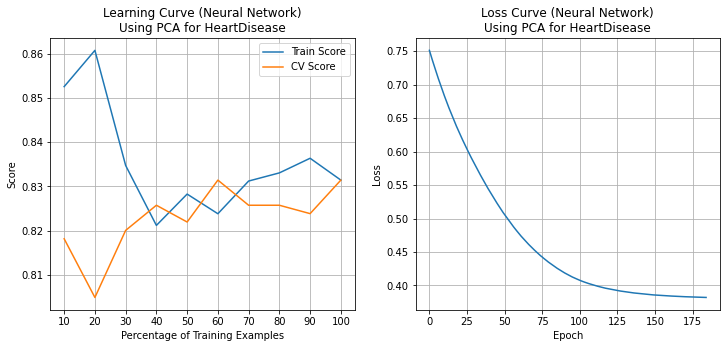

In [33]:
nn_classifier_pca = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_pca, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_PCA_train,y_PCA_train, 
    X_PCA_test, y_PCA_test, 
    nn_classifier_pca
)
metrics.append({'Model':'PCA','Train Time':train_time, 'Pred Time':pred_time, 'Accuracy':acc})
nn_classifier_pca = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_pca.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_pca.best_params_['alpha']
)
nn_classifier_pca.fit(X_PCA_train, y_PCA_train)
plot_learning_loss_curves(ls, nn_classifier_pca, X_PCA_train, y_PCA_train, 'PCA', target_col)

## ICA w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 16}
Time to train: 133.82466340065002
Accuracy for best neural network: 0.7973568281938326
Time to infer: 0.0


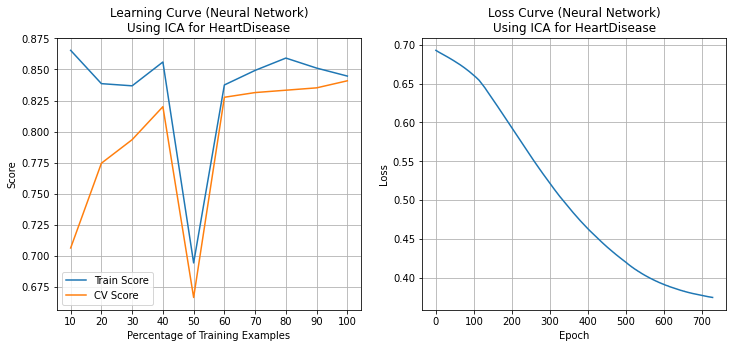

In [34]:
nn_classifier_ica = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_ica, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_ICA_train, y_ICA_train, 
    X_ICA_test, y_ICA_test, 
    nn_classifier_ica
)
metrics.append({'Model':'ICA','Train Time':train_time, 'Pred Time':pred_time, 'Accuracy':acc})

nn_classifier_ica = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_ica.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_ica.best_params_['alpha']
)
nn_classifier_ica.fit(X_ICA_train, y_ICA_train)
plot_learning_loss_curves(ls, nn_classifier_ica, X_ICA_train, y_ICA_train, 'ICA', target_col)

## RP w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 6}
Time to train: 81.8271005153656
Accuracy for best neural network: 0.6651982378854625
Time to infer: 0.0


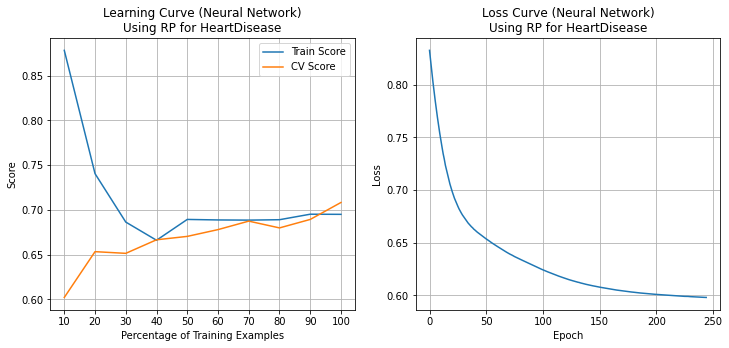

In [35]:
nn_classifier_rp = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_rp, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_RP_train, y_RP_train, 
    X_RP_test, y_RP_test, 
    nn_classifier_rp
)
metrics.append({'Model':'RP','Train Time':train_time, 'Pred Time':pred_time, 'Accuracy':acc})

nn_classifier_rp = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_rp.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_rp.best_params_['alpha']
)
nn_classifier_rp.fit(X_RP_train, y_RP_train)
plot_learning_loss_curves(ls, nn_classifier_rp, X_RP_train, y_RP_train, 'RP', target_col)

## DT w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 16}
Time to train: 138.52697277069092
Accuracy for best neural network: 0.8193832599118943
Time to infer: 0.0


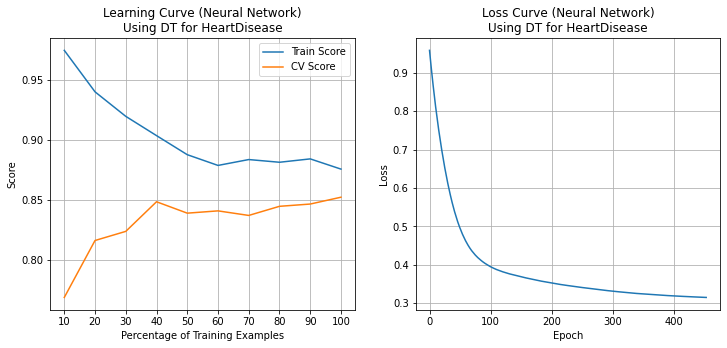

In [36]:
nn_classifier_dt = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_dt, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_tree_train, y_tree_train, 
    X_tree_test, y_tree_test, 
    nn_classifier_dt
)
metrics.append({'Model':'DT','Train Time':train_time, 'Pred Time':pred_time, 'Accuracy':acc})

nn_classifier_dt = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_dt.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_dt.best_params_['alpha']
)
nn_classifier_dt.fit(X_tree_train, y_tree_train)
plot_learning_loss_curves(ls, nn_classifier_dt, X_tree_train, y_tree_train, 'DT', target_col)

## kMeans w NN

Best params for neural network: {'alpha': 10.0, 'hidden_layer_sizes': 14}
Time to train: 177.07981300354004
Accuracy for best neural network: 0.788546255506608
Time to infer: 0.0


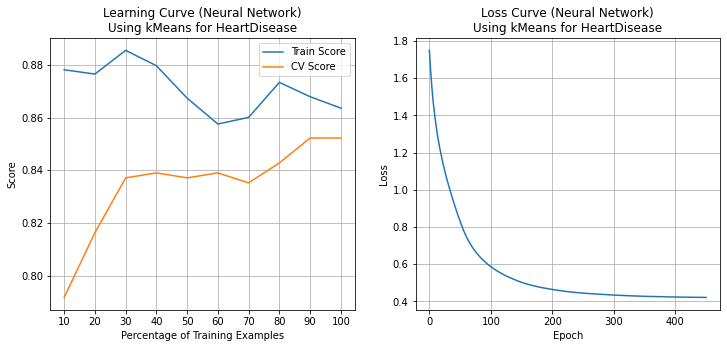

In [37]:
k = 6
km = KMeans(n_clusters=k, random_state=0)
X_km = np.append(X, km.fit_transform(X), 1)
X_km_train, X_km_test, y_km_train, y_km_test = train_test_split(X_km, y, test_size=0.3, random_state=0)

nn_classifier_km = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_km, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_km_train, y_km_train, 
    X_km_test, y_km_test, 
    nn_classifier_km
)
metrics.append({'Model':'kMeans','Train Time':train_time, 'Pred Time':pred_time, 'Accuracy':acc})

nn_classifier_km = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_km.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_km.best_params_['alpha']
)
nn_classifier_km.fit(X_km_train, y_km_train)
plot_learning_loss_curves(ls, nn_classifier_km, X_km_train, y_km_train, 'kMeans', target_col)

## EM w NN

Best params for neural network: {'alpha': 1.0, 'hidden_layer_sizes': 6}
Time to train: 167.9818139076233
Accuracy for best neural network: 0.801762114537445
Time to infer: 0.0


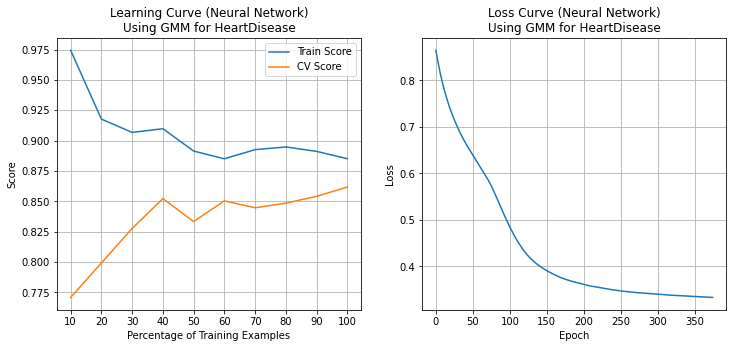

In [38]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
X_GMM = np.append(X, gmm.predict_proba(X), 1)
X_GMM_train, X_GMM_test, y_GMM_train, y_GMM_test = train_test_split(X_GMM, y, test_size=0.3, random_state=0)

nn_classifier_gmm = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_gmm, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_GMM_train, y_GMM_train, 
    X_GMM_test, y_GMM_test, 
    nn_classifier_gmm
)
metrics.append({'Model':'GMM','Train Time':train_time, 'Pred Time':pred_time, 'Accuracy':acc})

nn_classifier_gmm = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_gmm.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_gmm.best_params_['alpha']
)
nn_classifier_gmm.fit(X_GMM_train, y_GMM_train)

# plotting learning curve 
plot_learning_loss_curves(ls, nn_classifier_gmm, X_GMM_train, y_GMM_train, 'GMM', target_col)

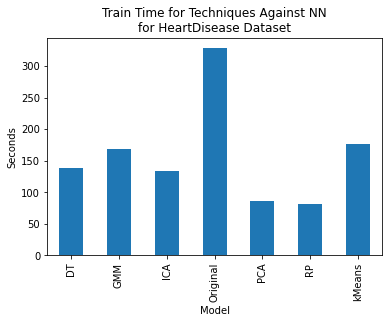

In [39]:
pd.DataFrame(metrics).groupby('Model').sum()['Train Time'].plot.bar(
    title=f'Train Time for Techniques Against NN\nfor {target_col} Dataset',
    ylabel='Seconds'
);